<a href="https://colab.research.google.com/github/sunandhini96/School_of_AI_Assignment_8/blob/main/sunandini_assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sunandhini96/Main_Models.git

Cloning into 'Main_Models'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 235 (delta 70), reused 0 (delta 0), pack-reused 108
Receiving objects: 100% (235/235), 70.60 KiB | 330.00 KiB/s, done.
Resolving deltas: 100% (110/110), done.


In [2]:
cd /content/Main_Models

/content/Main_Models


In [3]:
!ls

main.py  Models  README.md  utils.py


In [4]:
from Models import *

In [5]:
from main import *

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [6]:
!pip install torch_lr_finder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from Models.custom_resnet import CustomResNet,ResBlock

hello
CUDA Available? True


/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
torch.Size([60, 3, 32, 32])
Files already downloaded and verified


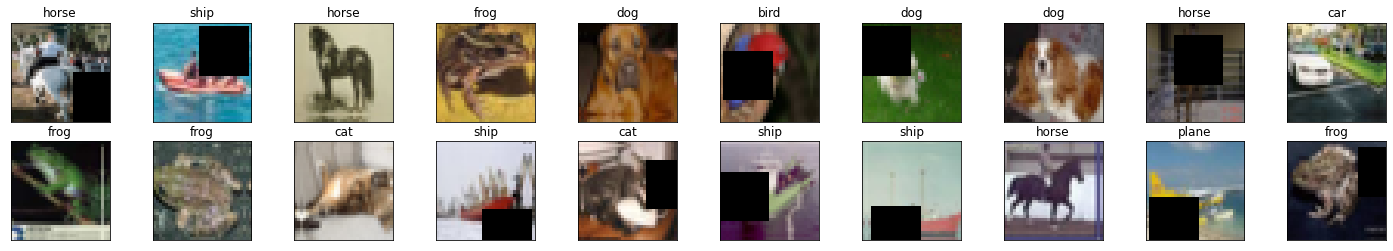

In [8]:
from utils import *

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = CustomResNet(ResBlock).to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
         ResBlock-14          [-1,

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import albumentations as A
from albumentations.pytorch import ToTensorV2

import torch
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import datasets, transforms
from tqdm import tqdm

In [11]:
# loading the dataset
exp = datasets.CIFAR10('./data', train=True, download=True)
exp_data = exp.data

# Calculate the mean and std for normalization
print('[Train]')
print(' - Numpy Shape:', exp_data.shape)
print(' - min:', np.min(exp_data, axis=(0,1,2)) / 255.)
print(' - max:', np.max(exp_data, axis=(0,1,2)) / 255.)
print(' - mean:', np.mean(exp_data, axis=(0,1,2)) / 255.)
print(' - std:', np.std(exp_data, axis=(0,1,2)) / 255.)
print(' - var:', np.var(exp_data, axis=(0,1,2)) / 255.)

Files already downloaded and verified
[Train]
 - Numpy Shape: (50000, 32, 32, 3)
 - min: [0. 0. 0.]
 - max: [1. 1. 1.]
 - mean: [0.49139968 0.48215841 0.44653091]
 - std: [0.24703223 0.24348513 0.26158784]
 - var: [15.56135559 15.11767693 17.44919073]


In [12]:
exp.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

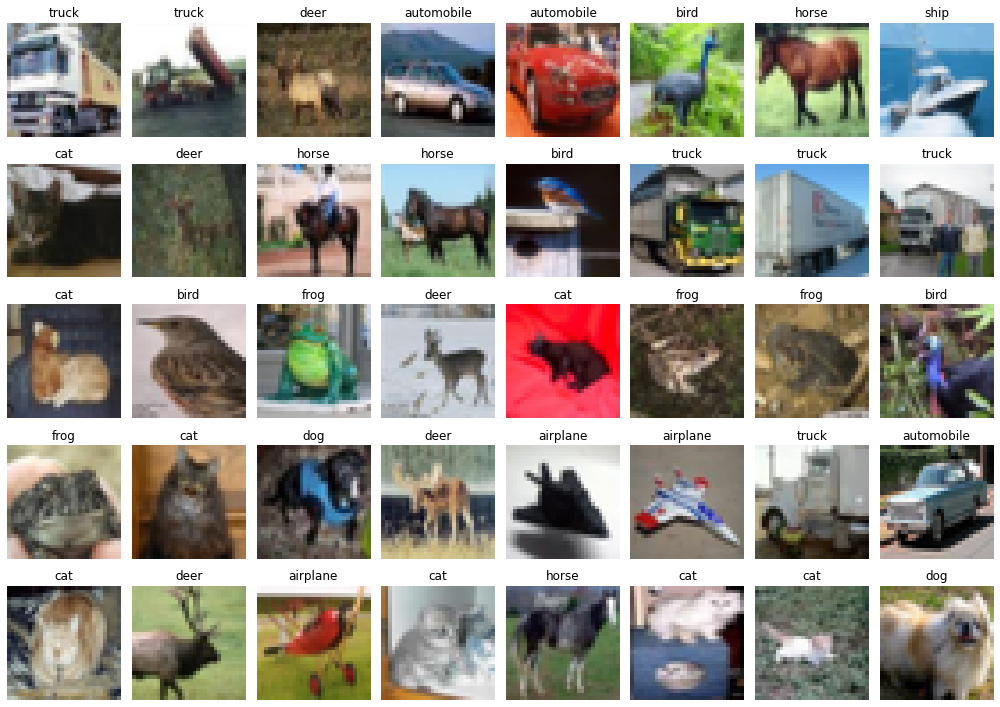

In [13]:
viz_data()


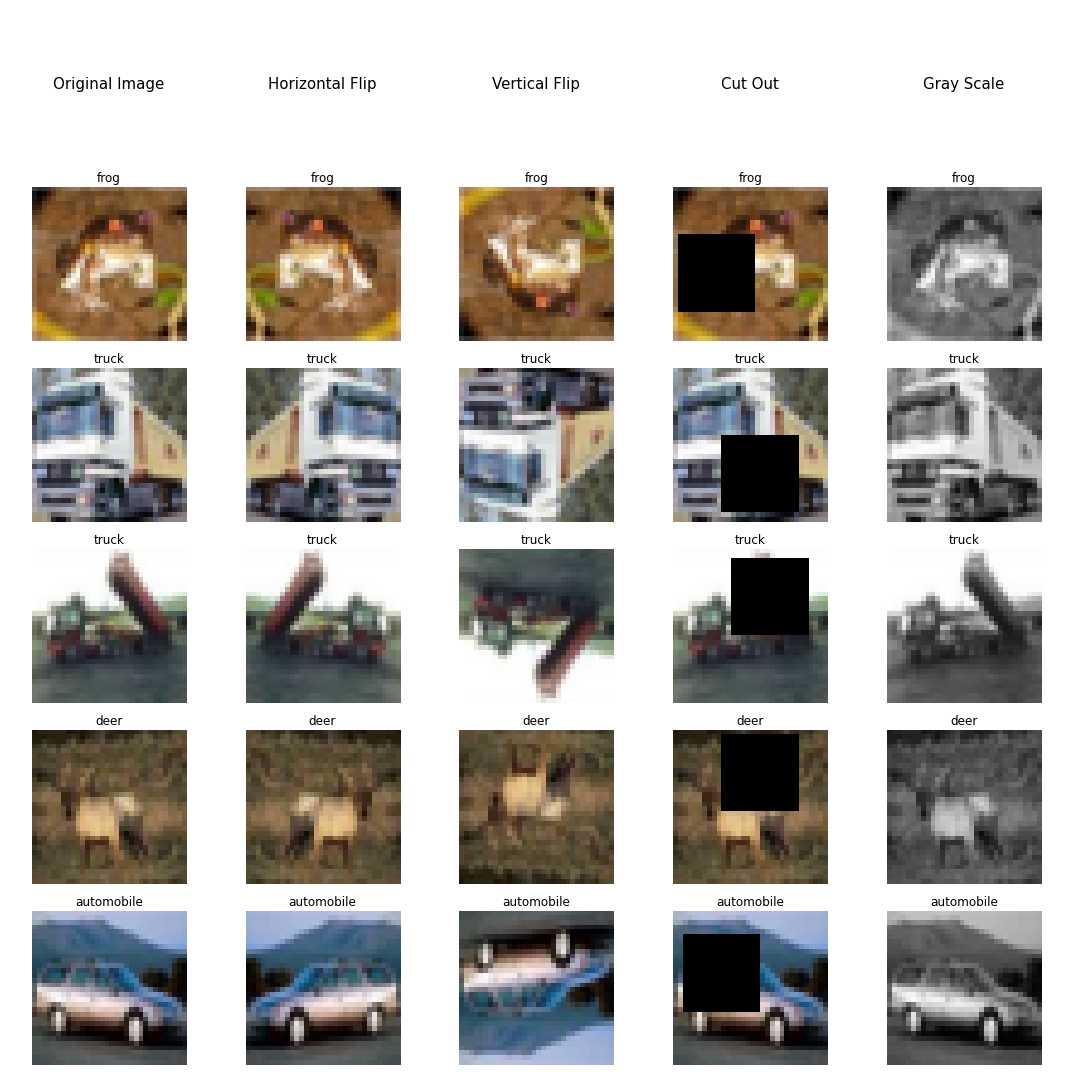

In [14]:
show_images({
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=16, 
                               min_width=16, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
})

In [15]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available:", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)
    BATCH_SIZE=512
else:
    BATCH_SIZE=64

CUDA Available: True


In [16]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True )
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(trainset, train=True), batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(testset, train=False), batch_size=BATCH_SIZE,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.41E-02


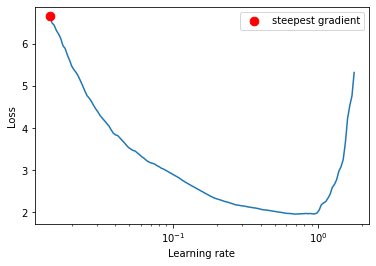

In [26]:
net4 = CustomResNet(ResBlock).to(device)
import copy
net4_exp = copy.deepcopy(net4)
optimizer = torch.optim.Adam(net4.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(net4, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, end_lr=10, num_iter=200)
lr_finder.plot() 

In [27]:
min_loss = min(lr_finder.history['loss'])
ler_rate = lr_finder.history['lr'][np.argmin(lr_finder.history['loss'], axis=0)]
print("Max LR is {}".format(ler_rate))

Max LR is 0.6905513520162327


In [28]:
min_lr=ler_rate/10
print("Min LR is {}".format(min_lr))

Min LR is 0.06905513520162328


In [29]:

optimizer = torch.optim.SGD(net4.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr=ler_rate,
                                                steps_per_epoch=len(train_loader), 
                                                epochs=24,
                                                pct_start=0.2,
                                                div_factor=10,
                                                three_phase=False, 
                                                final_div_factor=50,
                                                anneal_strategy='linear'
                                                ) #final_div_factor=100,
net, history = fit_model(
    net=net4, device=device,
    criterion = nn.CrossEntropyLoss(),
    train_loader=train_loader, test_loader=test_loader,
    optimizer=optimizer, 
    scheduler=scheduler, 
    NUM_EPOCHS=24
)

EPOCH: 1 (LR: 0.06905513520162328)


Batch_id=97 Loss=6.03847 Accuracy=12.44%: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]



Test set: Average loss: 2.2796, Accuracy: 1948/10000 (19.48%)

EPOCH: 2 (LR: 0.19880935175005043)


Batch_id=97 Loss=2.23268 Accuracy=16.15%: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]



Test set: Average loss: 2.1602, Accuracy: 1858/10000 (18.58%)

EPOCH: 3 (LR: 0.3285635682984776)


Batch_id=97 Loss=2.18326 Accuracy=16.39%: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]



Test set: Average loss: 2.1209, Accuracy: 2008/10000 (20.08%)

EPOCH: 4 (LR: 0.4583177848469048)


Batch_id=97 Loss=2.17780 Accuracy=16.50%: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]



Test set: Average loss: 2.0927, Accuracy: 1897/10000 (18.97%)

EPOCH: 5 (LR: 0.588072001395332)


Batch_id=97 Loss=2.17027 Accuracy=16.86%: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]



Test set: Average loss: 2.1456, Accuracy: 2151/10000 (21.51%)

EPOCH: 6 (LR: 0.683006227050336)


Batch_id=97 Loss=2.14930 Accuracy=18.46%: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]



Test set: Average loss: 2.0413, Accuracy: 2241/10000 (22.41%)

EPOCH: 7 (LR: 0.6471119432319923)


Batch_id=97 Loss=2.10320 Accuracy=20.52%: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]



Test set: Average loss: 2.0154, Accuracy: 2493/10000 (24.93%)

EPOCH: 8 (LR: 0.6112176594136485)


Batch_id=97 Loss=2.08077 Accuracy=21.59%: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]



Test set: Average loss: 2.0204, Accuracy: 2309/10000 (23.09%)

EPOCH: 9 (LR: 0.5753233755953047)


Batch_id=97 Loss=2.04091 Accuracy=23.41%: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]



Test set: Average loss: 1.9390, Accuracy: 2824/10000 (28.24%)

EPOCH: 10 (LR: 0.539429091776961)


Batch_id=97 Loss=2.01351 Accuracy=25.21%: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]



Test set: Average loss: 1.9345, Accuracy: 2890/10000 (28.90%)

EPOCH: 11 (LR: 0.5035348079586172)


Batch_id=97 Loss=1.99317 Accuracy=25.79%: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]



Test set: Average loss: 1.9040, Accuracy: 3106/10000 (31.06%)

EPOCH: 12 (LR: 0.46764052414027346)


Batch_id=97 Loss=1.96963 Accuracy=26.74%: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]



Test set: Average loss: 1.8619, Accuracy: 3193/10000 (31.93%)

EPOCH: 13 (LR: 0.43174624032192965)


Batch_id=97 Loss=1.93501 Accuracy=27.80%: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]



Test set: Average loss: 1.8793, Accuracy: 3225/10000 (32.25%)

EPOCH: 14 (LR: 0.3958519565035859)


Batch_id=97 Loss=1.91501 Accuracy=28.34%: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]



Test set: Average loss: 1.8521, Accuracy: 3084/10000 (30.84%)

EPOCH: 15 (LR: 0.35995767268524215)


Batch_id=97 Loss=6.69674 Accuracy=27.82%: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]



Test set: Average loss: 57.3260, Accuracy: 1274/10000 (12.74%)

EPOCH: 16 (LR: 0.32406338886689834)


Batch_id=97 Loss=8.21455 Accuracy=11.68%: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]



Test set: Average loss: 2.2809, Accuracy: 1440/10000 (14.40%)

EPOCH: 17 (LR: 0.2881691050485546)


Batch_id=97 Loss=2.26796 Accuracy=14.26%: 100%|██████████| 98/98 [00:27<00:00,  3.52it/s]



Test set: Average loss: 2.2427, Accuracy: 1589/10000 (15.89%)

EPOCH: 18 (LR: 0.25227482123021083)


Batch_id=97 Loss=2.20440 Accuracy=17.26%: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]



Test set: Average loss: 2.0839, Accuracy: 2264/10000 (22.64%)

EPOCH: 19 (LR: 0.21638053741186708)


Batch_id=97 Loss=2.07277 Accuracy=22.30%: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]



Test set: Average loss: 2.0109, Accuracy: 2535/10000 (25.35%)

EPOCH: 20 (LR: 0.18048625359352333)


Batch_id=97 Loss=2.00133 Accuracy=24.32%: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]



Test set: Average loss: 1.8794, Accuracy: 2939/10000 (29.39%)

EPOCH: 21 (LR: 0.14459196977517952)


Batch_id=97 Loss=1.94469 Accuracy=26.24%: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]



Test set: Average loss: 1.8373, Accuracy: 2951/10000 (29.51%)

EPOCH: 22 (LR: 0.10869768595683582)


Batch_id=97 Loss=1.90765 Accuracy=27.09%: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]



Test set: Average loss: 1.8274, Accuracy: 3012/10000 (30.12%)

EPOCH: 23 (LR: 0.07280340213849201)


Batch_id=97 Loss=1.87884 Accuracy=28.80%: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]



Test set: Average loss: 1.7756, Accuracy: 3260/10000 (32.60%)

EPOCH: 24 (LR: 0.036909118320148315)


Batch_id=97 Loss=1.85191 Accuracy=30.39%: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]



Test set: Average loss: 1.7607, Accuracy: 3345/10000 (33.45%)

